In [34]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/badvideogames/youtube_comments_TUu7-i1kMyg.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=TUu7-i1kMyg,"I talked to Ubisoft Devs, it's far worse than ...",2024-09-26T14:00:32Z,@LegendaryDrops,Thanks to everyone and the developers for supp...,2024-09-26T07:48:25Z,105,1538
1,https://www.youtube.com/watch?v=TUu7-i1kMyg,"I talked to Ubisoft Devs, it's far worse than ...",2024-09-26T14:00:32Z,@ヅAmunyt,"we dont care what u say, and most of yall are ...",2024-11-09T02:04:36Z,0,0
2,https://www.youtube.com/watch?v=TUu7-i1kMyg,"I talked to Ubisoft Devs, it's far worse than ...",2024-09-26T14:00:32Z,@AdamMckirch,They fuck up great games doing stupid shit. Th...,2024-11-07T18:11:48Z,0,0
3,https://www.youtube.com/watch?v=TUu7-i1kMyg,"I talked to Ubisoft Devs, it's far worse than ...",2024-09-26T14:00:32Z,@Bossup20,Just a bunch of white millennials who dont get...,2024-11-07T03:41:31Z,0,0
4,https://www.youtube.com/watch?v=TUu7-i1kMyg,"I talked to Ubisoft Devs, it's far worse than ...",2024-09-26T14:00:32Z,@Bossup20,THIS IS CRAZY. AND THE COMMENT SECTION IS EVEN...,2024-11-07T03:35:55Z,2,1
...,...,...,...,...,...,...,...,...
7478,https://www.youtube.com/watch?v=TUu7-i1kMyg,"I talked to Ubisoft Devs, it's far worse than ...",2024-09-26T14:00:32Z,@DrDenticle,Only so much loss can be written off in one fi...,2024-09-26T14:02:15Z,27,1528
7479,https://www.youtube.com/watch?v=TUu7-i1kMyg,"I talked to Ubisoft Devs, it's far worse than ...",2024-09-26T14:00:32Z,@joshuathomasverghese1341,Might as well get my refund on AC Shadows Delu...,2024-09-26T14:02:13Z,3,11
7480,https://www.youtube.com/watch?v=TUu7-i1kMyg,"I talked to Ubisoft Devs, it's far worse than ...",2024-09-26T14:00:32Z,@legin777,First,2024-09-26T14:01:25Z,0,0
7481,https://www.youtube.com/watch?v=TUu7-i1kMyg,"I talked to Ubisoft Devs, it's far worse than ...",2024-09-26T14:00:32Z,@michaelperrine2754,New legendary drop? LETSGOOOO,2024-09-26T14:01:22Z,0,3


In [36]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
     'like', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ig n', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review',
    'assassin','creed','buy','game','star','war','history','month',"company", "one", "say", "would", "want", "man"
])
lmtzr = WordNetLemmatizer()

In [37]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [38]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
0,2024-09-26,Thanks to everyone and the developers for supp...,thanks everyone developer supporting last feel...
687,2024-10-03,I've been praying on the downfall of ubisoft s...,ive praying downfall ubisoft since reworked ho...
688,2024-10-03,You're a racist prick,racist prick
689,2024-10-03,I haven't seen any Japanese ppl upset. Only wh...,havent seen japanese ppl upset white guy
690,2024-10-03,Ubisoft game have been trasparente for years b...,ubisoft game trasparente year
...,...,...,...
7478,2024-09-26,Only so much loss can be written off in one fi...,loss written one fiscal year…
7479,2024-09-26,Might as well get my refund on AC Shadows Delu...,might refund shadow deluxe edition look next s...
7480,2024-09-26,First,first
7481,2024-09-26,New legendary drop? LETSGOOOO,new legendary drop letsgoooo


In [39]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=0).reset_index(drop=True)  # Use any integer as the random_state

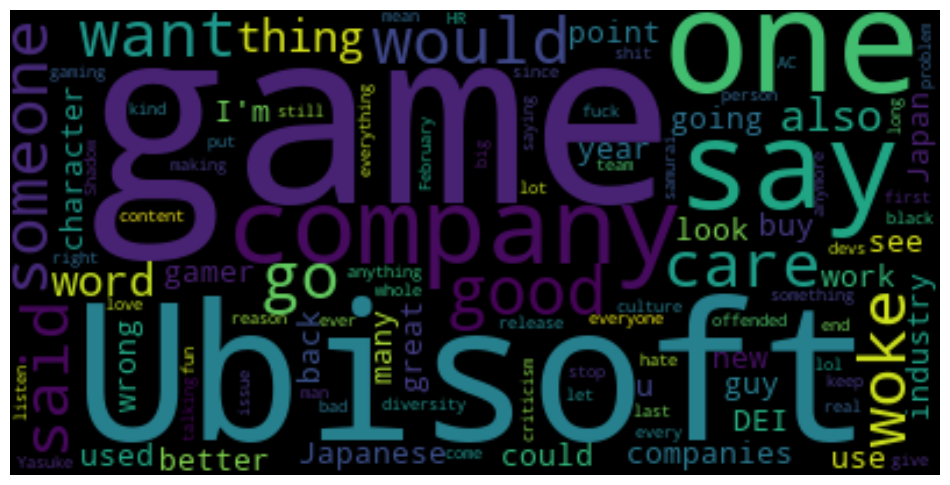

In [40]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly negative comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2024-09-26,They fucked up AC Valhalla and Odyssey as well...,fucked valhalla odyssey injecting modern socie...,negative
1,2024-10-02,Oh land of the free,land free,positive
2,2024-09-26,I heard there will be a strike on October 15 o...,heard strike october onwards,negative
3,2024-09-27,"Question i think should be asked is , where is...",question asked gen gamers millennials main buy...,negative
4,2024-09-28,As a black man I can honestly say being woke i...,black man honestly say woke retarted,positive
...,...,...,...,...
495,2024-09-27,You say that people should foster an environme...,say foster environment criticism confrontation...,negative
496,2024-09-26,a hyperbolic fear mongering video on youtube. ...,hyperbolic fear mongering youtube surprised,negative
497,2024-09-27,This shit is so sad and cringe. White male ups...,shit sad cringe white male upset game nothing ...,negative
498,2024-09-26,If they wanted a black assassin so bad why not...,wanted black assassin bad assassin creed zimbabwe,negative


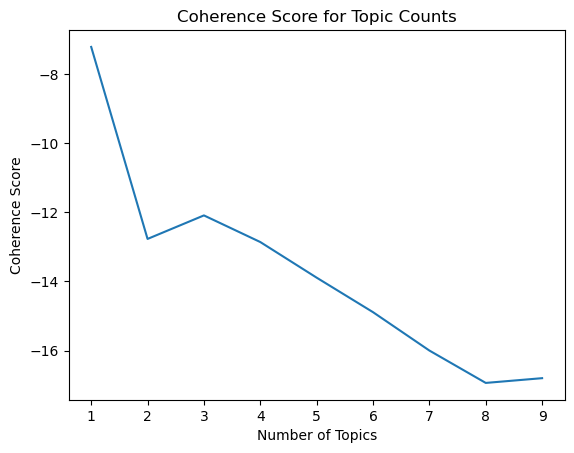

In [42]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [43]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 1
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.003*"ubisoft" + 0.002*"black" + 0.002*"woke" + 0.001*"japanese" + 0.001*"samurai" + 0.001*"word" + 0.001*"great" + 0.001*"thing" + 0.001*"said" + 0.001*"care"')]


The curve sharply drop after one, meaning that adding more topics decrease significantly the coherence scores.

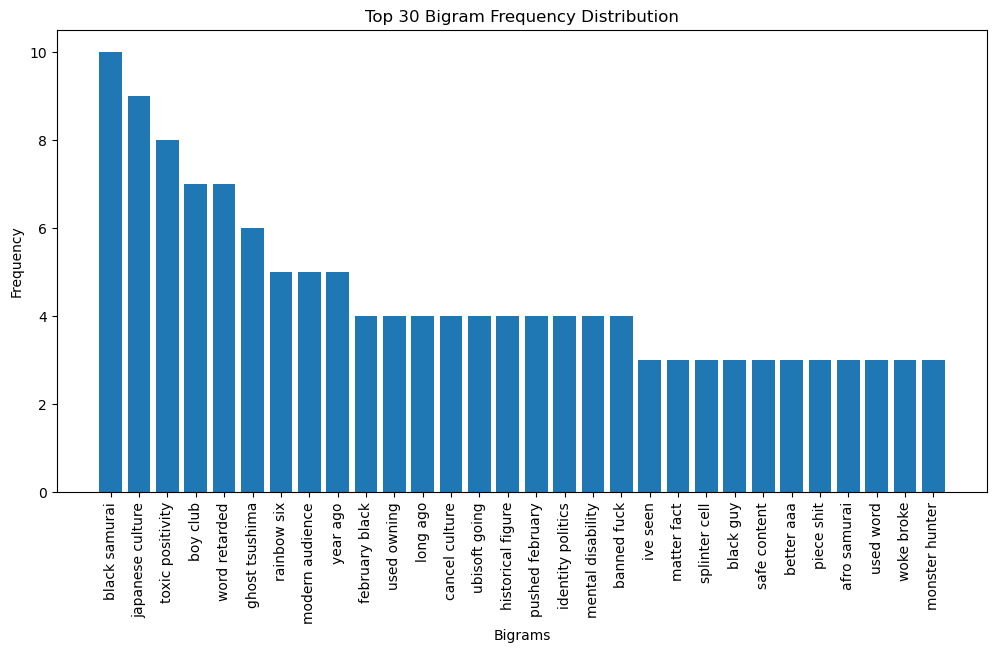

In [45]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [46]:
#Load the existing df_topics CSV file
#title=DF['title'].unique()
#file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv'
#df_bad_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
#new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
#df_bad_topics = pd.concat([df_bad_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
#df_bad_topics.to_csv(file_path, index=False)
#df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
1,Fallout 76 Angry Review,1
2,Is Kingdom Come Deliverance Racist?,1
3,"So far, I do not recommend: Battlefield 2042 (...",4
4,Call of Duty: Modern Warfare 3 Single-Player C...,1
5,Suicide Squad: Kill the Justice League Review,3
6,Atomic Heart is 2023's First Major Disappointm...,2
7,Concord Review,1
8,"I talked to Ubisoft Devs, it's far worse than ...",1
